In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [34]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "plantvillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [7]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

This is showing 68 because we divided the images into batches of 68(68*32=2176, since last batch doesn't contain 32) 

In [8]:
len(dataset)

68

In [11]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 2 0 0 0 1 1 1 0 1 0 0 1 1]


In [14]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[149. 144. 151.]
  [141. 136. 143.]
  [154. 149. 156.]
  ...
  [176. 173. 180.]
  [172. 169. 176.]
  [169. 166. 173.]]

 [[150. 145. 152.]
  [141. 136. 143.]
  [150. 145. 152.]
  ...
  [171. 168. 175.]
  [178. 175. 182.]
  [182. 179. 186.]]

 [[158. 153. 160.]
  [149. 144. 151.]
  [153. 148. 155.]
  ...
  [172. 169. 176.]
  [173. 170. 177.]
  [174. 171. 178.]]

 ...

 [[127. 124. 133.]
  [126. 123. 132.]
  [119. 116. 125.]
  ...
  [164. 161. 172.]
  [163. 160. 171.]
  [161. 158. 169.]]

 [[135. 132. 141.]
  [143. 140. 149.]
  [136. 133. 142.]
  ...
  [158. 155. 166.]
  [159. 156. 167.]
  [159. 156. 167.]]

 [[141. 138. 147.]
  [158. 155. 164.]
  [146. 143. 152.]
  ...
  [158. 155. 166.]
  [163. 160. 171.]
  [166. 163. 174.]]]


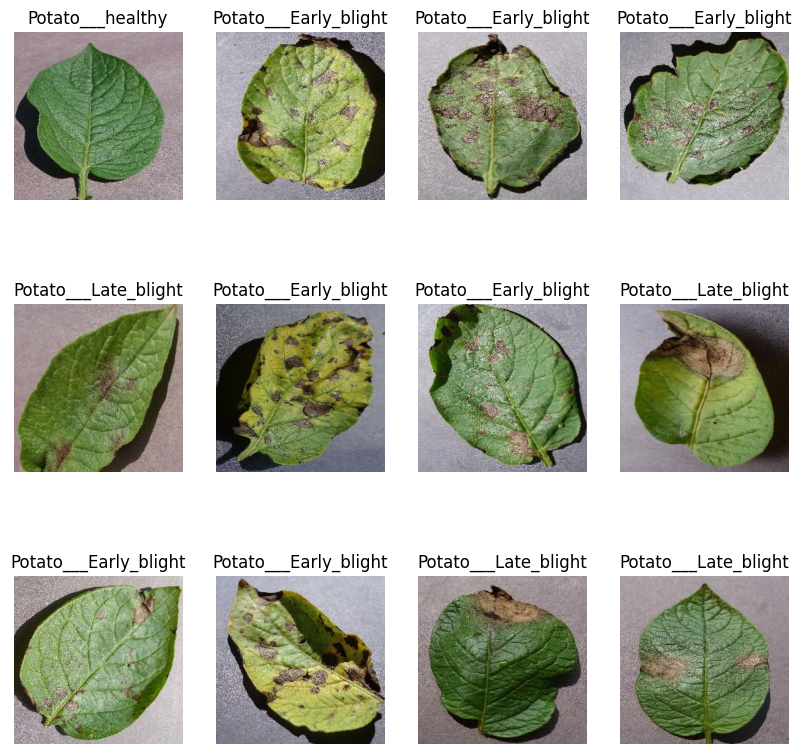

In [33]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))  #astype("uinit8") is used for converting the floating point values to integers
        plt.title(class_names[label_batch[i]])
        plt.axis("off") # for removing the numbering at x and y axises
    


In [36]:
train_size=0.8
len(dataset)*0.8


54.400000000000006

In [44]:
train_ds=dataset.take(54)

In [45]:
val_and_test_ds=dataset.skip(54) 
len(val_and_test_ds)

14

In [46]:
validation_size=0.1
len(dataset)*validation_size

6.800000000000001

In [47]:
val_ds=val_and_test_ds.take(6)

In [48]:
test_ds=val_and_test_ds.skip(6)
len(test_ds)

8

In [49]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size=len(dataset)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [51]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset) # same as the train_test_split in ML

In [52]:
print(len(train_ds),len(val_ds),len(test_ds))

54 6 8


In [54]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [55]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0 / 255)
])


AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'